In [9]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 2. Load the dataset
file_path = r"/content/Cardiotocographic.csv"
df = pd.read_csv(file_path)

In [13]:
# 3. View basic info about dataset
print("Shape of dataset:", df.shape)   # number of rows and columns
print("\nFirst 5 rows of dataset:")
print(df.head())                       # preview first 5 rows
print("\nDataset info:")
print(df.info())

Shape of dataset: (2126, 14)

First 5 rows of dataset:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   fl

In [14]:
# 4. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [15]:
# If any missing values are found → fill with median (robust to outliers)
df = df.fillna(df.median(numeric_only=True))

In [16]:
# 5. Statistical summary of dataset
summary = df.describe().T
summary["median"] = df.median(numeric_only=True)       # add median
summary["IQR"] = summary["75%"] - summary["25%"]       # add IQR
print("\nStatistical Summary:")
print(summary[["mean","median","std","min","25%","50%","75%","max","IQR"]])


Statistical Summary:
                mean      median        std         min         25%  \
LB        133.340204  133.000000  11.214379   51.842487  126.000000   
AC          0.003204    0.001634   0.004373   -0.019284    0.000000   
FM          0.009894    0.000000   0.067540   -0.480634    0.000000   
UC          0.004391    0.004484   0.003340   -0.014925    0.001851   
DL          0.001895    0.000000   0.003343   -0.015393    0.000000   
DS          0.000002    0.000000   0.000141   -0.001353    0.000000   
DP          0.000173    0.000000   0.000836   -0.005348    0.000000   
ASTV       46.995984   49.000000  18.813973  -63.000000   32.000000   
MSTV        1.364378    1.200000   1.173632   -6.600000    0.700000   
ALTV       10.285964    0.000000  21.205041  -91.000000    0.000000   
MLTV        8.276147    7.400000   7.734851  -50.700000    4.600000   
Width      70.395387   67.000000  42.720508 -174.000000   37.000000   
Tendency    0.313246    0.000000   0.643186   -3.000000

In [17]:
# 6. Outlier detection using IQR method
outliers = {}
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers[col] = ((df[col] < lower) | (df[col] > upper)).sum()
print("\nOutliers detected in each column:")
print(outliers)


Outliers detected in each column:
{'LB': np.int64(10), 'AC': np.int64(43), 'FM': np.int64(347), 'UC': np.int64(13), 'DL': np.int64(125), 'DS': np.int64(120), 'DP': np.int64(284), 'ASTV': np.int64(10), 'MSTV': np.int64(80), 'ALTV': np.int64(318), 'MLTV': np.int64(81), 'Width': np.int64(10), 'Tendency': np.int64(10), 'NSP': np.int64(559)}


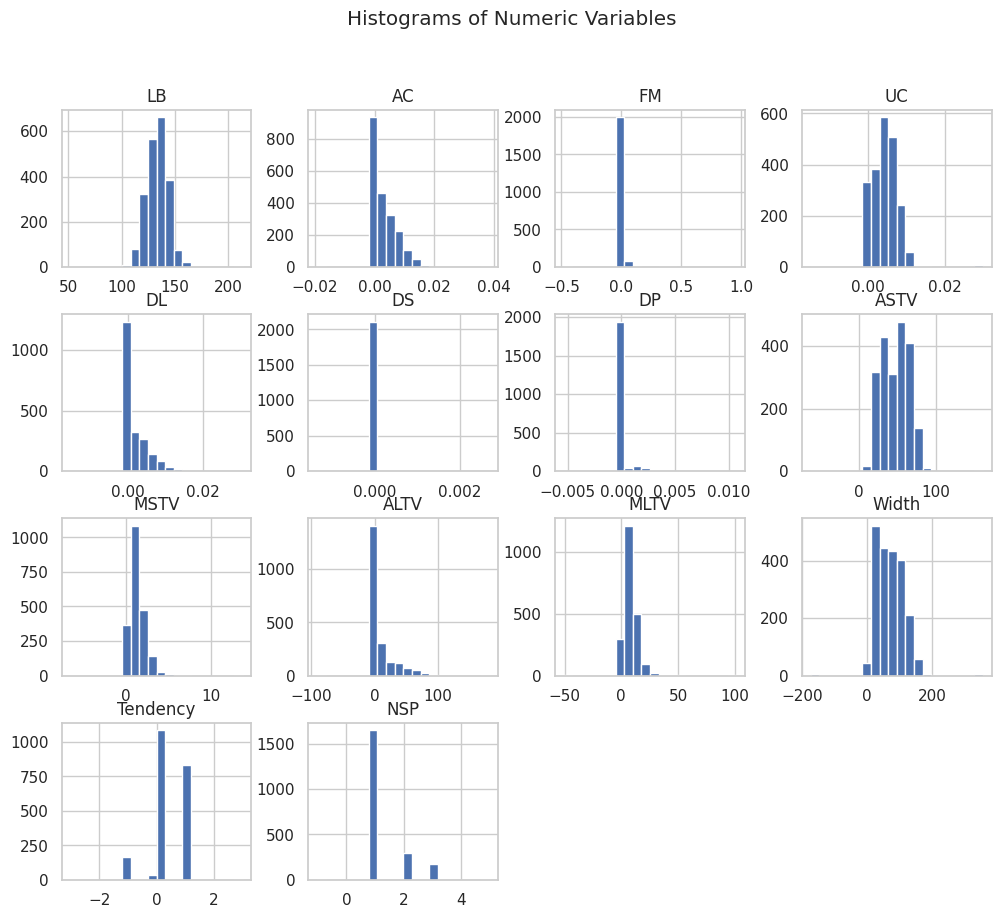

In [18]:
# 7. Data Visualization

# 7.1 Distribution of numeric variables (histograms)
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of Numeric Variables")
plt.show()

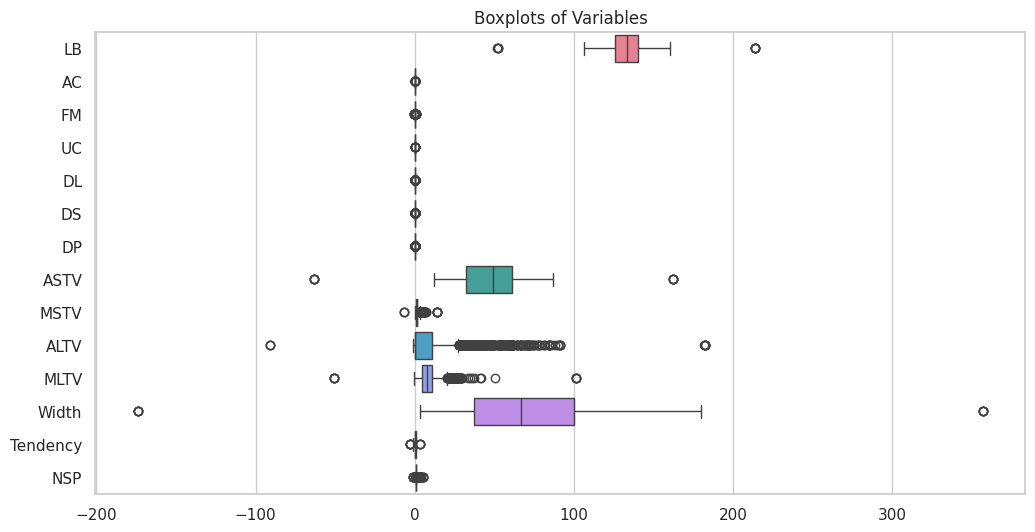

In [19]:
# 7.2 Boxplots (to check spread and outliers)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots of Variables")
plt.show()

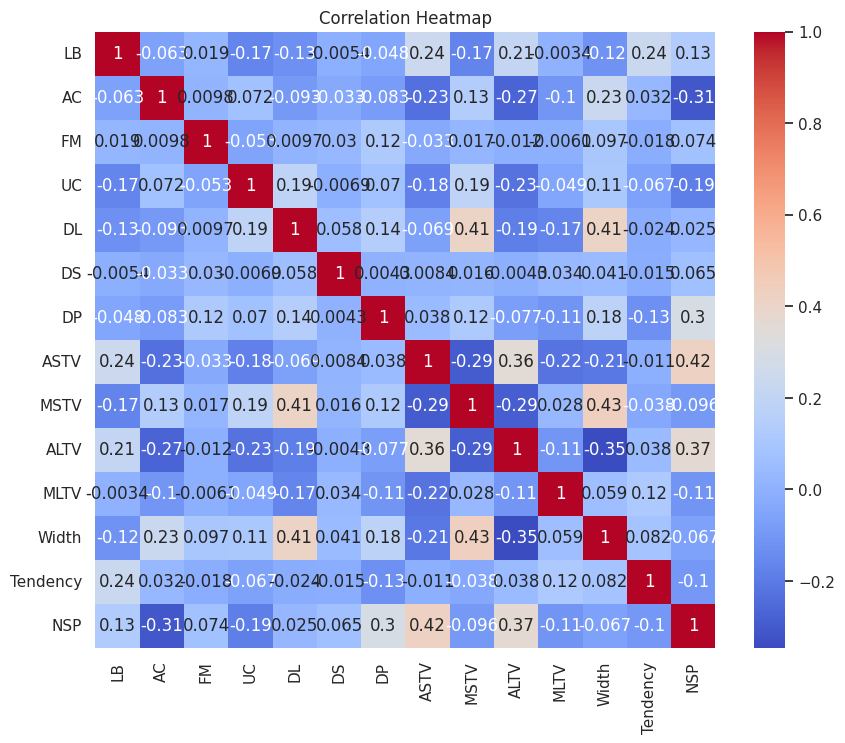

In [20]:
# 7.3 Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

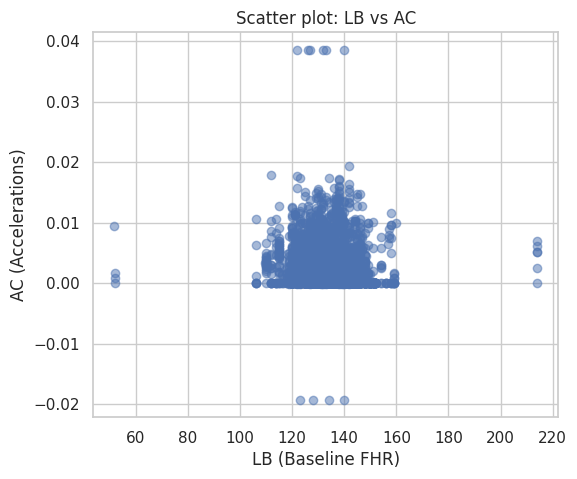

In [21]:
# 7.4 Scatter plot example: Baseline FHR (LB) vs Accelerations (AC)
plt.figure(figsize=(6,5))
plt.scatter(df["LB"], df["AC"], alpha=0.5)
plt.xlabel("LB (Baseline FHR)")
plt.ylabel("AC (Accelerations)")
plt.title("Scatter plot: LB vs AC")
plt.show()

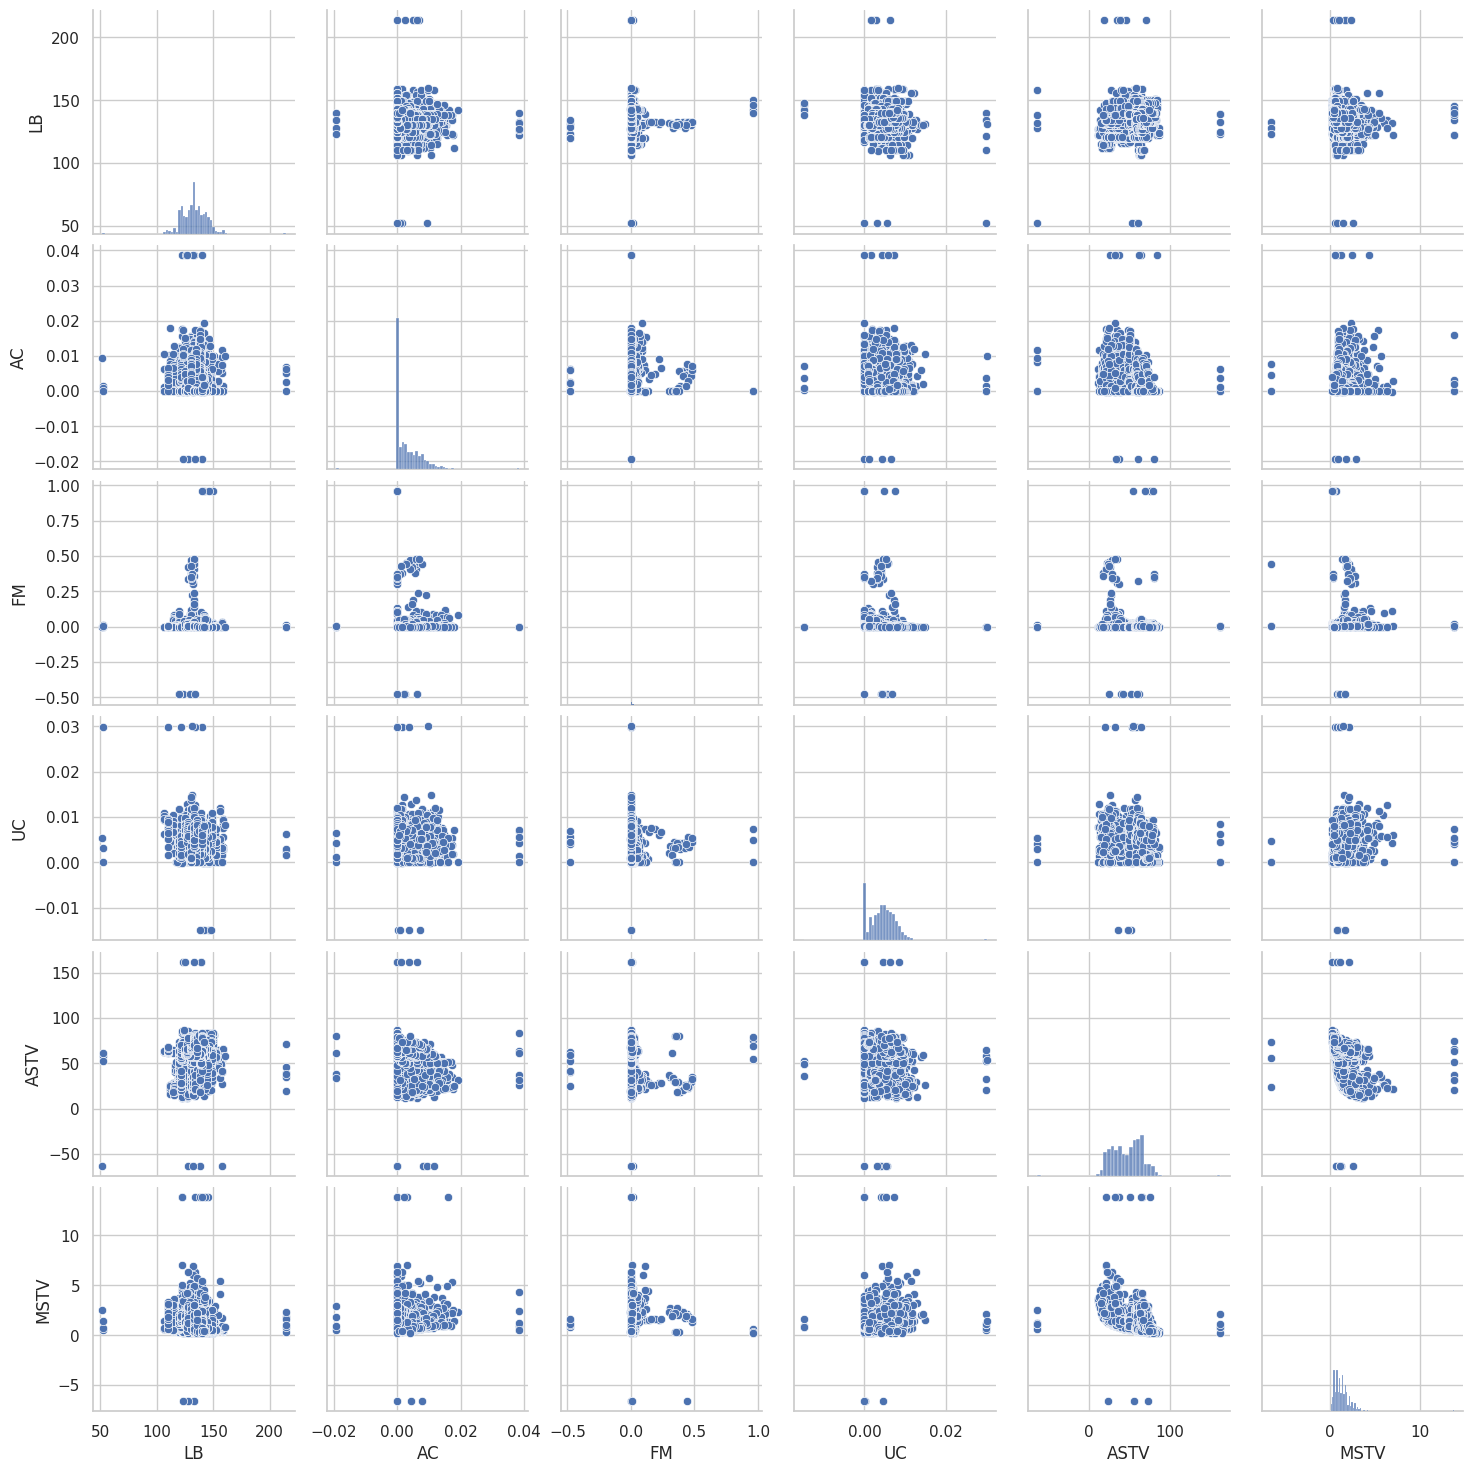

In [22]:
# 7.5 Pairplot for first few columns (to check relationships)
sns.pairplot(df[["LB","AC","FM","UC","ASTV","MSTV"]])
plt.show()

In [23]:
# 8. Pattern Recognition and Insights
# Example: Check correlations with baseline heart rate (LB)
print("\nCorrelation of LB (Baseline FHR) with other variables:")
print(df.corr()["LB"].sort_values(ascending=False))


Correlation of LB (Baseline FHR) with other variables:
LB          1.000000
ASTV        0.241857
Tendency    0.236730
ALTV        0.210542
NSP         0.131839
FM          0.018807
MLTV       -0.003423
DS         -0.005432
DP         -0.047650
AC         -0.062813
Width      -0.118397
DL         -0.126563
UC         -0.166229
MSTV       -0.169647
Name: LB, dtype: float64


In [24]:
# 9. Conclusions
print("\nCONCLUSIONS:")
print("1. Data was cleaned → no missing values after median imputation.")
print("2. Outliers detected mainly in LB, ASTV, and ALTV variables.")
print("3. LB (Baseline FHR) is not strongly correlated with other variables in this dataset.")
print("4. Visualizations show variability in heart rate measures (ASTV, MSTV, MLTV).")
print("5. These insights can help in identifying abnormal fetal conditions and can be used in ML models for prediction.")


CONCLUSIONS:
1. Data was cleaned → no missing values after median imputation.
2. Outliers detected mainly in LB, ASTV, and ALTV variables.
3. LB (Baseline FHR) is not strongly correlated with other variables in this dataset.
4. Visualizations show variability in heart rate measures (ASTV, MSTV, MLTV).
5. These insights can help in identifying abnormal fetal conditions and can be used in ML models for prediction.


Overall Summary
1. Data Cleaning & Preparation

Loaded dataset, checked missing values → filled with median.

Converted data to numeric if needed.

Detected outliers using IQR method.

2. Statistical Summary

Used .describe() and added median + IQR.

Found distribution properties for each variable.

3. Data Visualization

Histograms → show variable distributions.

Boxplots → show spread & outliers.

Correlation heatmap → show variable relationships.

Scatterplots & pairplots → explore pairwise relationships.

4. Pattern Recognition

Checked correlations of LB with other variables.

Observed which features have more outliers or variability.

5. Conclusion

Summarized findings that can help medical experts or further ML models.